In [73]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import statistics

In [86]:
conn = sqlite3.connect("Databases\Players\ManchesterCity\RaheemSterling\RaheemSterling_All_Shots_Data.db")
sql_query = """SELECT date, minute, result, h_a,
    CAST(xG as REAL) as xG,
    X*120 AS y,
    Y*80 AS x,
    CASE
        WHEN result == "Goal" THEN 1
        WHEN result != "Goal" THEN 0
    END AS "goal_binary"
    FROM RaheemSterling_All_Shots_Data
    """
df = pd.read_sql(sql_query, conn)
conn.close()

df_left_6yard = df.loc[df.x>30].loc[df.x<40].loc[df.y>114].loc[df.y<120]
df_right_6yard = df.loc[df.x>40].loc[df.x<50].loc[df.y>114].loc[df.y<120]

df_top_left_halfspace = df.loc[df.x>18].loc[df.x<30].loc[df.y>111].loc[df.y<120]
df_bottom_left_halfspace = df.loc[df.x>18].loc[df.x<30].loc[df.y>102].loc[df.y<111]
df_top_right_halfspace = df.loc[df.x>50].loc[df.x<62].loc[df.y>111].loc[df.y<120]
df_bottom_right_halfspace = df.loc[df.x>50].loc[df.x<62].loc[df.y>102].loc[df.y<111]

df_left_penalty = df.loc[df.x>30].loc[df.x<40].loc[df.y>102].loc[df.y<114]
df_right_penalty = df.loc[df.x>40].loc[df.x<50].loc[df.y>102].loc[df.y<114]

df_inside = df.loc[df.x>18].loc[df.x<120].loc[df.y>0].loc[df.y<102]
df_left_outside = df.loc[df.x>0].loc[df.x<18].loc[df.y>0].loc[df.y<120]
df_right_outside = df.loc[df.x>62].loc[df.x<80].loc[df.y>0].loc[df.y<120]

In [87]:
left_6yard_xgdif = (df_left_6yard.goal_binary.sum()) - (df_left_6yard.xG.sum())
right_6yard_xgdif = (df_right_6yard.goal_binary.sum()) - (df_right_6yard.xG.sum())

top_left_halfspace_xgdif = (df_top_left_halfspace.goal_binary.sum()) - (df_top_left_halfspace.xG.sum())
bottom_left_halfspace_xgdif = (df_bottom_left_halfspace.goal_binary.sum()) - (df_bottom_left_halfspace.xG.sum())
top_right_halfspace_xgdif = (df_top_right_halfspace.goal_binary.sum()) - (df_top_right_halfspace.xG.sum())
bottom_right_halfspace_xgdif = (df_bottom_right_halfspace.goal_binary.sum()) - (df_bottom_right_halfspace.xG.sum())

left_penalty_xgdif = (df_left_penalty.goal_binary.sum()) - (df_left_penalty.xG.sum())
right_penalty_xgdif = (df_right_penalty.goal_binary.sum()) - (df_right_penalty.xG.sum())

inside_xgdif = (df_inside.goal_binary.sum()) - (df_inside.xG.sum())
left_outside_xgdif = (df_left_outside.goal_binary.sum()) - (df_left_outside.xG.sum())
right_outside_xgdif = (df_right_outside.goal_binary.sum()) - (df_right_outside.xG.sum())

average_xgdif = statistics.mean([left_6yard_xgdif, right_6yard_xgdif, top_left_halfspace_xgdif, bottom_left_halfspace_xgdif, top_right_halfspace_xgdif, bottom_right_halfspace_xgdif, left_penalty_xgdif, right_penalty_xgdif, inside_xgdif, left_outside_xgdif, right_outside_xgdif])
max_xgdif = max([left_6yard_xgdif, right_6yard_xgdif, top_left_halfspace_xgdif, bottom_left_halfspace_xgdif, top_right_halfspace_xgdif, bottom_right_halfspace_xgdif, left_penalty_xgdif, right_penalty_xgdif, inside_xgdif, left_outside_xgdif, right_outside_xgdif])
min_xgdif = min([left_6yard_xgdif, right_6yard_xgdif, top_left_halfspace_xgdif, bottom_left_halfspace_xgdif, top_right_halfspace_xgdif, bottom_right_halfspace_xgdif, left_penalty_xgdif, right_penalty_xgdif, inside_xgdif, left_outside_xgdif, right_outside_xgdif])

In [88]:
def get_colour(xgdif):
    if xgdif > 0:
        colour = 'green'
        alpha = xgdif/max_xgdif
    else:
        colour = 'red'
        alpha = xgdif/min_xgdif
    return [colour, alpha]

In [91]:
colour, alpha= get_colour(left_6yard_xgdif)
left_6yard= plt.Rectangle((30,114), 10, 6, fc=colour, ec='w', alpha = alpha)
colour, alpha= get_colour(right_6yard_xgdif)
right_6yard = plt.Rectangle((40,114), 10, 6, fc=colour, ec='w', alpha=alpha)

colour, alpha= get_colour(top_left_halfspace_xgdif)
top_left_halfspace = plt.Rectangle((18,111), 12, 9, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(bottom_left_halfspace_xgdif)
bottom_left_halfspace = plt.Rectangle((18,102), 12, 9, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(top_right_halfspace_xgdif)
top_right_halfspace = plt.Rectangle((50,111), 12, 9, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(bottom_right_halfspace_xgdif)
bottom_right_halfspace = plt.Rectangle((50,102), 12, 9, fc=colour, ec='w', alpha=alpha)

colour, alpha= get_colour(left_penalty_xgdif)
left_penalty = plt.Rectangle((30,102), 10, 12, fc=colour, ec='w', alpha=alpha)
colour, alpha= get_colour(right_penalty_xgdif)
right_penalty = plt.Rectangle((40,102), 10, 12, fc=colour, ec='w', alpha=.5)

colour, alpha= get_colour(inside_xgdif)
inside = plt.Rectangle((18, 0), 44, 102, fc=colour, ec='w', alpha=.5)
colour, alpha= get_colour(left_outside_xgdif)
left_outside = plt.Rectangle((0,0), 18,120,fc=colour,ec='w',alpha=.5)
colour, alpha= get_colour(right_outside_xgdif)
right_outside = plt.Rectangle((62,0), 18,120,fc=colour,ec='w',alpha=.5)

Text(0.5, 0.95, 'Raheem Sterling xG \n Overperformance Based of Shooting Position')

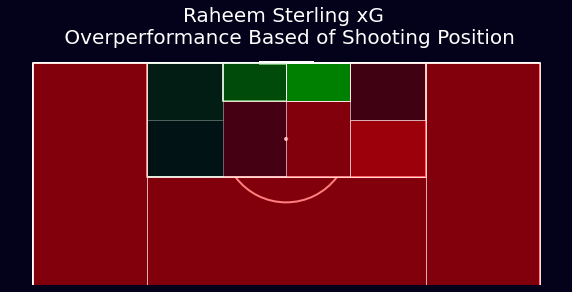

In [92]:
fig, axs = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#03021a') 
pitch = VerticalPitch(pitch_color='#03021a', line_color='white', half=True, pad_bottom=-25)
pitch.draw(ax=axs)

plt.gca().add_patch(left_6yard)
plt.gca().add_patch(right_6yard)

plt.gca().add_patch(top_left_halfspace)
plt.gca().add_patch(bottom_left_halfspace)
plt.gca().add_patch(top_right_halfspace)
plt.gca().add_patch(bottom_right_halfspace)

plt.gca().add_patch(left_penalty)
plt.gca().add_patch(right_penalty)

plt.gca().add_patch(inside)
plt.gca().add_patch(left_outside)
plt.gca().add_patch(right_outside)


plt.title('Raheem Sterling xG \n Overperformance Based of Shooting Position', y=0.95, fontsize=20, color='w')